In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/train.csv")
df.head()
df.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


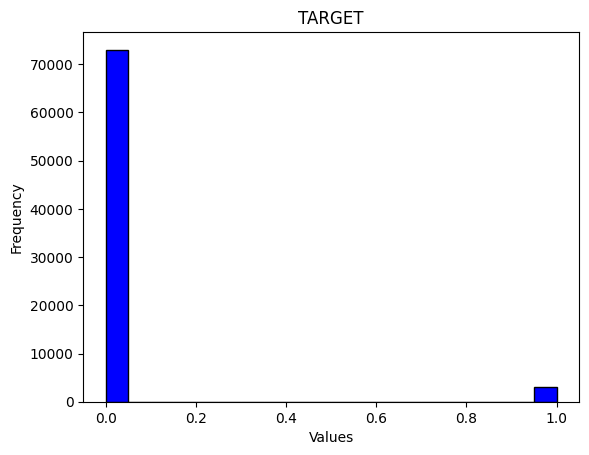

In [4]:

column_name = 'TARGET'

# Generate the histogram
plt.hist(df[column_name], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(column_name)

# Show the plot
plt.show()

In [5]:
df0=df[df['TARGET']==0]
df1=df[df['TARGET']==1]

In [6]:
import math
import scipy

def compare_features_binary(train, df1, df0, logscale=False):
    print("Number of catogory 0:", df0.shape[0])
    print("Number of catogory 1:", df1.shape[0])

    # Make a grid of plots
    N_Features = df.shape[1]
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.floor(math.sqrt(N_Features))
    if N_X * N_Y < N_Features:
        N_Y += 1

    print("Found", N_Features, "features. Creating grid of", N_X, "by", N_Y)

    # Histogram Features
    plt.figure(figsize=(50, 50))

    for i,column in enumerate(df0.columns):
        KS_test=scipy.stats.kstest(df0[column],df1[column]).statistic
        print(column,"KS Distribution Similarity Test:", KS_test)

        plt.subplot(N_X,N_Y,i+1)
        plt.title((KS_test))
        if logscale:
            plt.yscale("log")
        plt.hist(df0[column],bins=100, histtype="step", color="red",label="0",density=1, stacked=True)
        plt.hist(df1[column],bins=100, histtype="step", color="blue",label="1",density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.show()


Number of catogory 0: 3008
Number of catogory 1: 73012
Found 371 features. Creating grid of 20 by 19
ID KS Distribution Similarity Test: 0.02309575531740049
var3 KS Distribution Similarity Test: 0.00819921324503925
var15 KS Distribution Similarity Test: 0.360369918060686
imp_ent_var16_ult1 KS Distribution Similarity Test: 0.0054845072101233905
imp_op_var39_comer_ult1 KS Distribution Similarity Test: 0.013884904230257678
imp_op_var39_comer_ult3 KS Distribution Similarity Test: 0.014440336097476192
imp_op_var40_comer_ult1 KS Distribution Similarity Test: 0.0018601940689435548
imp_op_var40_comer_ult3 KS Distribution Similarity Test: 0.001730697722671093
imp_op_var40_efect_ult1 KS Distribution Similarity Test: 0.0032871126693250208
imp_op_var40_efect_ult3 KS Distribution Similarity Test: 0.003592166720480905
imp_op_var40_ult1 KS Distribution Similarity Test: 0.0022399589516617358
imp_op_var41_comer_ult1 KS Distribution Similarity Test: 0.012203983373179073
imp_op_var41_comer_ult3 KS Distri

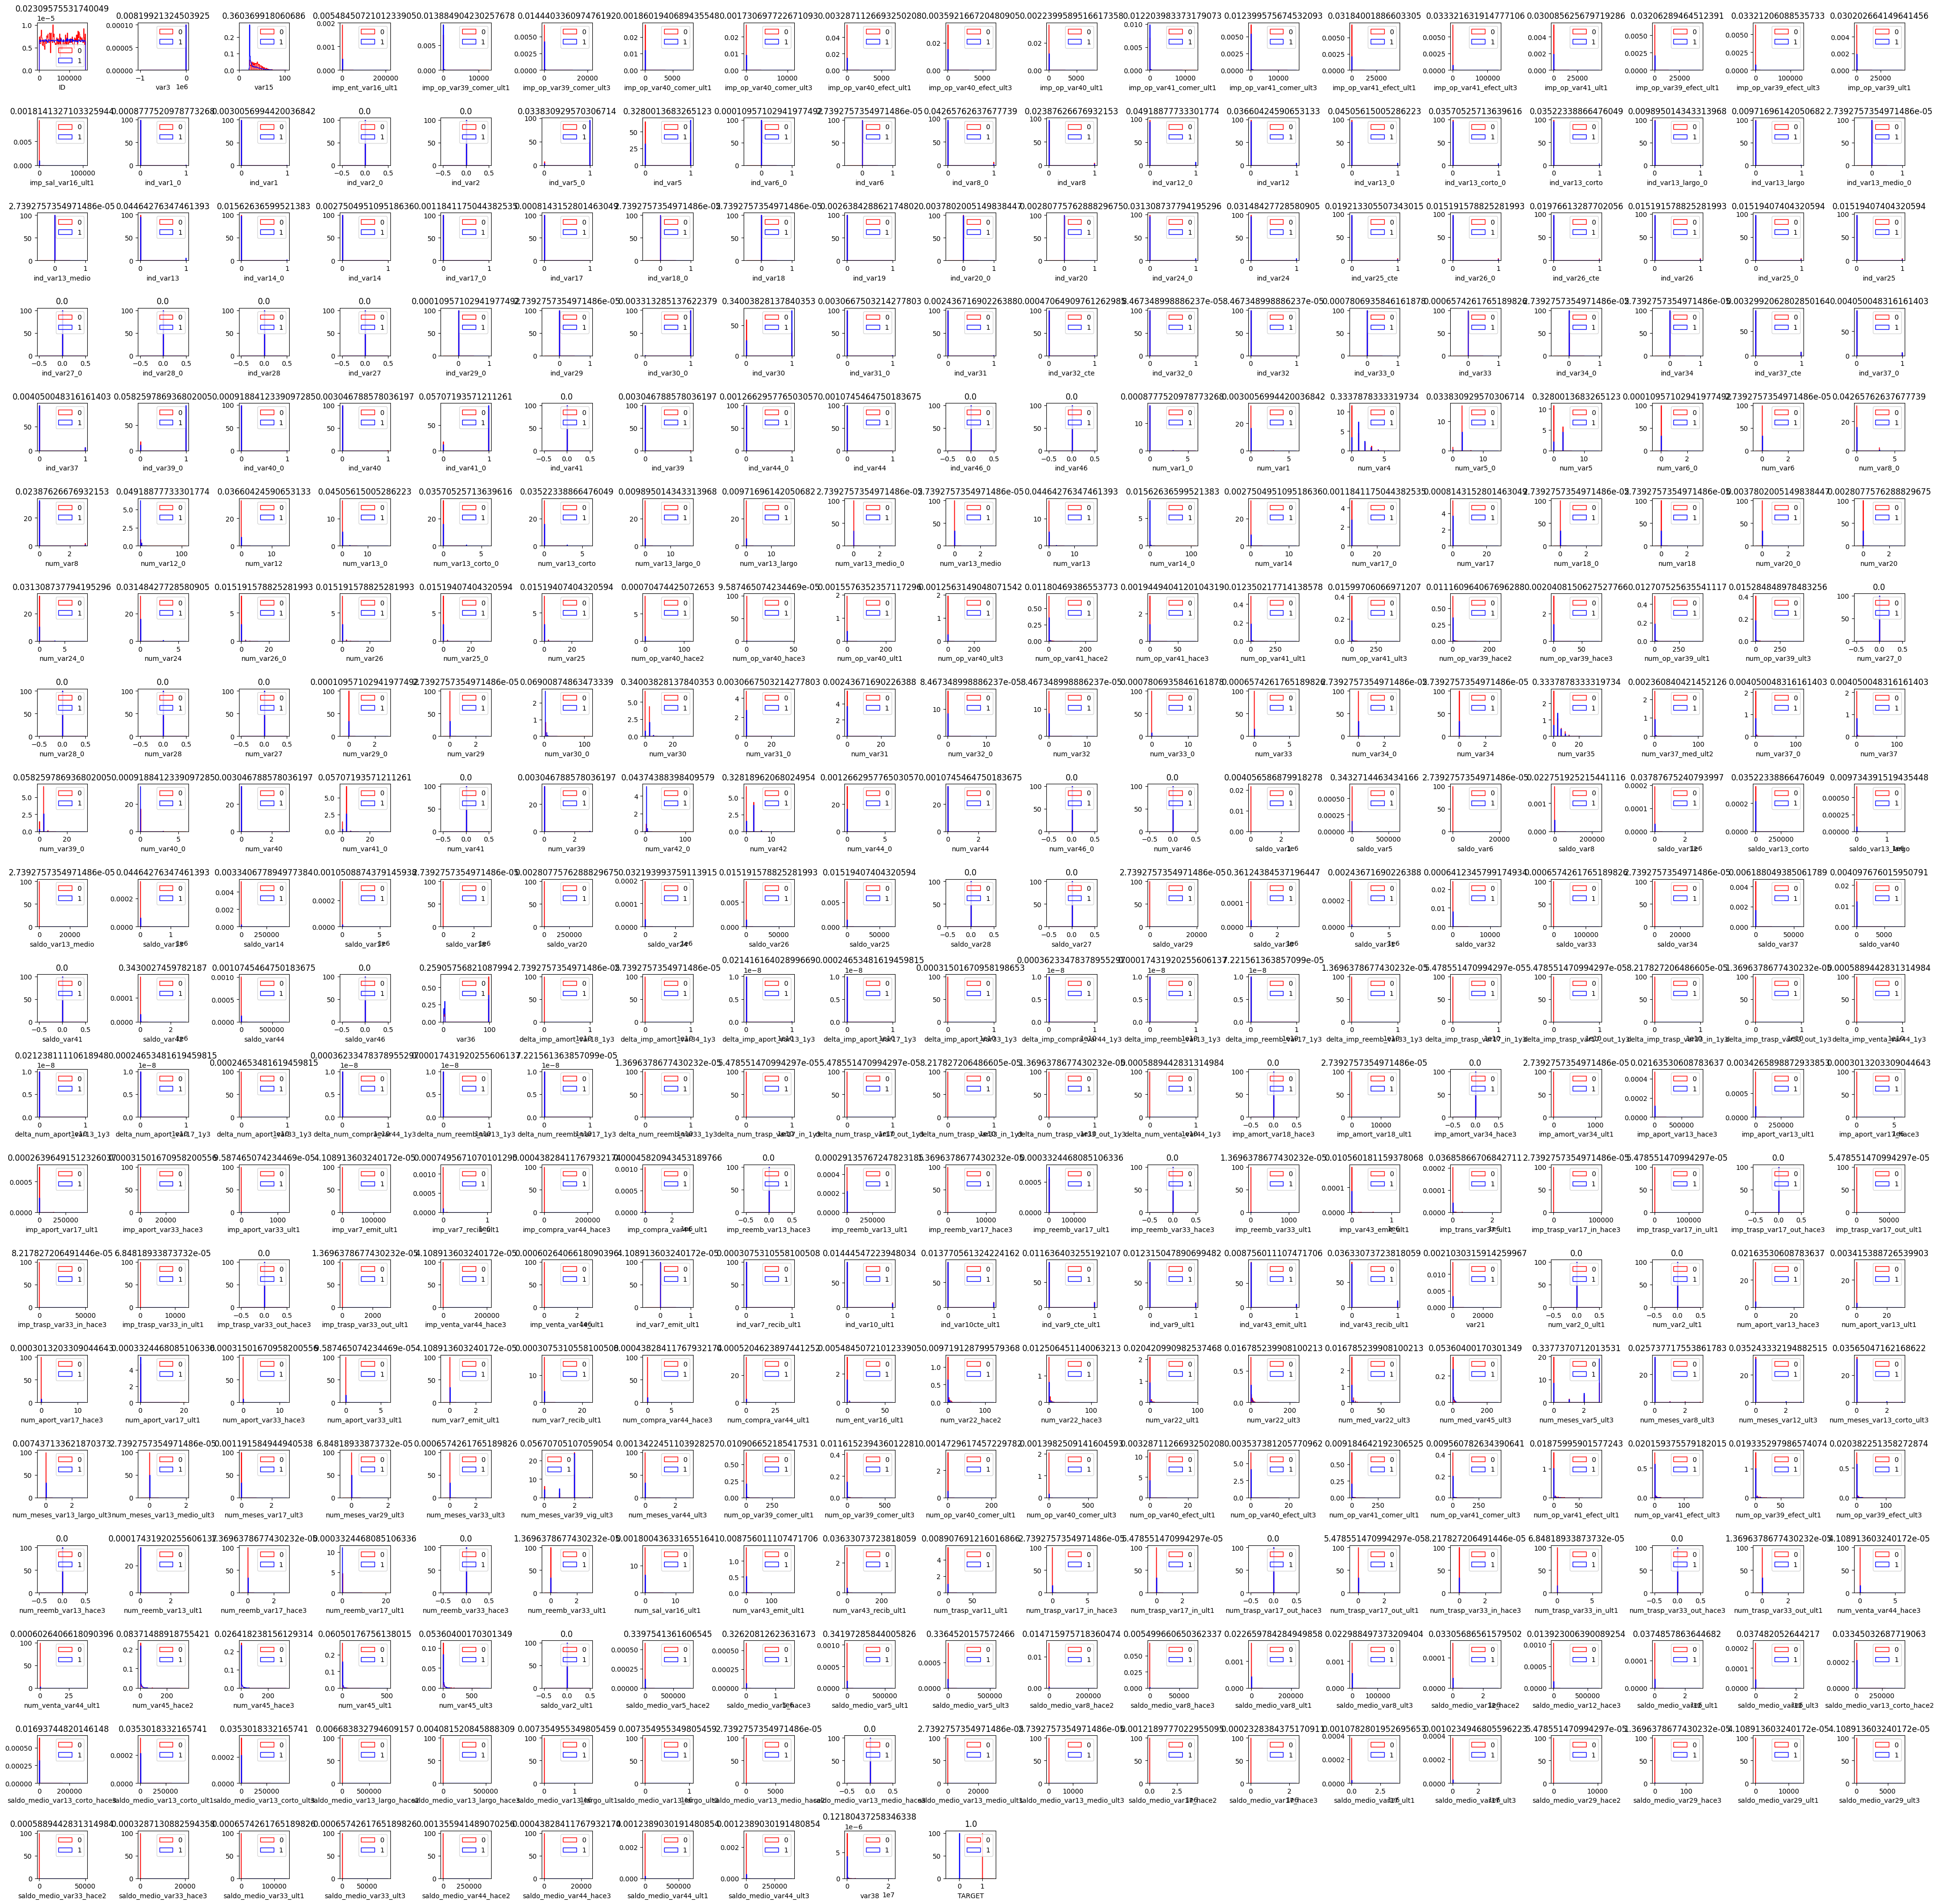

In [7]:

compare_features_binary("/content/train.csv",df0,df1)


In [8]:
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = data.corr(method='pearson')  # You can change to 'spearman' or 'kendall'

# Print the correlation matrix
print(correlation_matrix)


                               ID      var3     var15  imp_ent_var16_ult1  \
ID                       1.000000 -0.001025 -0.002135           -0.003111   
var3                    -0.001025  1.000000 -0.004452            0.001868   
var15                   -0.002135 -0.004452  1.000000            0.043722   
imp_ent_var16_ult1      -0.003111  0.001868  0.043722            1.000000   
imp_op_var39_comer_ult1 -0.001436  0.005989  0.094762            0.041221   
...                           ...       ...       ...                 ...   
saldo_medio_var44_hace3 -0.003674  0.000508  0.018884           -0.000612   
saldo_medio_var44_ult1  -0.000856  0.000738  0.032833            0.005055   
saldo_medio_var44_ult3   0.000297  0.000778  0.033597            0.006590   
var38                   -0.005687  0.000071  0.006497            0.000007   
TARGET                   0.003148  0.004475  0.101322           -0.000017   

                         imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  

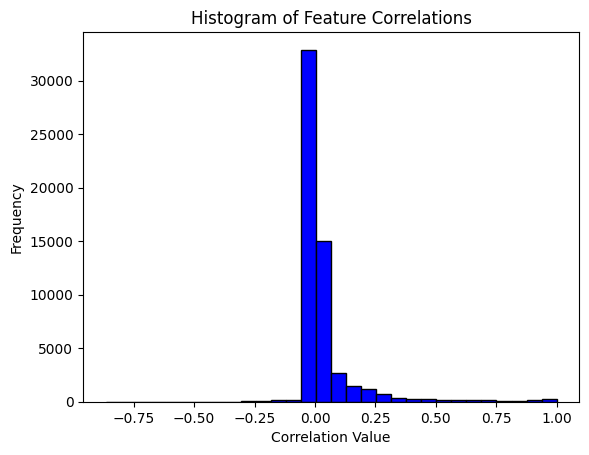

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Calculate the correlation matrix
c_matrix = data.corr()

# Set diagonal elements to zero
np.fill_diagonal(c_matrix.values, 0)

# Create an ordered dictionary of correlations, sorted by absolute value
corr_dict = OrderedDict()

for i in range(c_matrix.shape[0]):
    for j in range(i + 1, c_matrix.shape[0]):  # Avoid duplicate entries by only considering upper triangle
        corr_dict[(i, j)] = c_matrix.iat[i, j]

# Sort the dictionary by absolute values of the correlations
corr_dict_sorted = OrderedDict(sorted(corr_dict.items(), key=lambda x: abs(x[1]), reverse=True))

# Extract the values for histogram
values = list(corr_dict_sorted.values())

# Plot histogram
plt.hist(values, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Feature Correlations')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.show()


In [10]:
list(corr_dict_sorted.values())[-1:-26:-1]


[-5.68944873939066e-06,
 1.238252992713689e-05,
 -1.4628382211022964e-05,
 -1.4628382211022996e-05,
 -1.4628382211023034e-05,
 -1.4628382211023212e-05,
 -1.5355798779020316e-05,
 -1.5970684451063566e-05,
 -1.597068445106379e-05,
 -1.5970684451063922e-05,
 -1.619757921338635e-05,
 -1.6379835028179e-05,
 -1.7012291409369633e-05,
 -1.70761855002062e-05,
 -1.7682980294805713e-05,
 -1.780891620800799e-05,
 -1.7808916208008475e-05,
 -1.7808916208008576e-05,
 -1.8214949637533566e-05,
 -1.8603544695089666e-05,
 -1.8603544695089805e-05,
 -1.891826326135835e-05,
 -1.912071323875966e-05,
 -1.9626137484732517e-05,
 -1.966409276755619e-05]

In [11]:
list(corr_dict_sorted.keys())[-1:-25:-1]

[(293, 307),
 (230, 242),
 (222, 358),
 (222, 309),
 (222, 321),
 (222, 306),
 (354, 358),
 (224, 309),
 (224, 250),
 (224, 306),
 (227, 321),
 (351, 358),
 (352, 358),
 (222, 354),
 (358, 359),
 (231, 250),
 (231, 240),
 (231, 237),
 (222, 351),
 (196, 309),
 (196, 358),
 (222, 352),
 (351, 354),
 (222, 314)]

In [12]:
# Assuming 'd1' is the DataFrame itself
# Split the data into two DataFrames based on 'Target' value
data_target_0 = df[df["TARGET"] == 0]
data_target_1 = df[df["TARGET"] == 1]

# Compute the correlation matrices for each subset
c_df_0 = data_target_0.corr()
c_df_1 = data_target_1.corr()

# Optional: Display or inspect the correlation matrices
print("Correlation matrix for Target = 0:")
print(c_df_0)

print("Correlation matrix for Target = 1:")
print(c_df_1)


Correlation matrix for Target = 0:
                               ID      var3     var15  imp_ent_var16_ult1  \
ID                       1.000000 -0.000412 -0.002858           -0.003822   
var3                    -0.000412  1.000000 -0.005232            0.001876   
var15                   -0.002858 -0.005232  1.000000            0.044578   
imp_ent_var16_ult1      -0.003822  0.001876  0.044578            1.000000   
imp_op_var39_comer_ult1 -0.000360  0.006046  0.098686            0.039978   
...                           ...       ...       ...                 ...   
saldo_medio_var44_hace3 -0.003744  0.000524  0.019581           -0.000621   
saldo_medio_var44_ult1  -0.000875  0.000757  0.033527            0.004884   
saldo_medio_var44_ult3   0.000299  0.000796  0.034152            0.006342   
var38                   -0.006524  0.000227  0.009074           -0.000424   
TARGET                        NaN       NaN       NaN                 NaN   

                         imp_op_var39_co

In [4]:
df.shape

(76020, 371)

In [3]:
import math

# Calculate the total number of examples
N_total = df.shape[0]

# Calculate the size of the training, validation, and test datasets
N_train = math.floor(0.8 * N_total)
N_val = math.floor((N_total - N_train) / 2)
N_test = N_total - N_train - N_val  # This ensures all data is used without rounding issues

# Split the data into training, validation, and test sets
X_train = df.iloc[:N_train].drop(columns=["TARGET"])
Y_train = df["TARGET"].iloc[:N_train]

X_val = df.iloc[N_train:N_train + N_val].drop(columns=["TARGET"])
Y_val = df["TARGET"].iloc[N_train:N_train + N_val]

X_test = df.iloc[N_train + N_val:].drop(columns=["TARGET"])
Y_test = df["TARGET"].iloc[N_train + N_val:]

# Outputs the number of validation examples
print("Number of validation examples:", N_val)


Number of validation examples: 7602


In [8]:
import sklearn.discriminant_analysis as DA
# Instanciate Method
Fisher=DA.LinearDiscriminantAnalysis()

In [9]:
Fisher.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [10]:
Fisher.predict(X_val.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [11]:
X_val_0 = X_val[Y_val.to_numpy()==0]
X_val_1 = X_val[Y_val.to_numpy()==1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


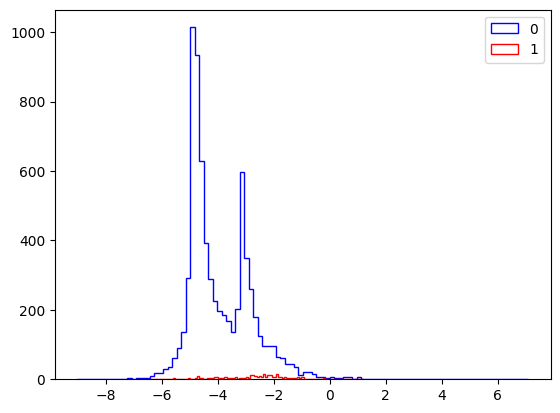

In [12]:
plt.figure()
plt.hist(Fisher.decision_function(X_val_0.to_numpy()),bins=100,histtype="step", color="blue", label="0",stacked=True)
plt.hist(Fisher.decision_function(X_val_1.to_numpy()),bins=100,histtype="step", color="red", label="1",stacked=True)
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


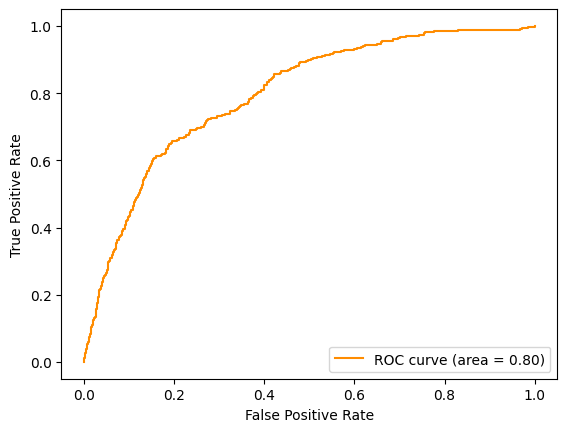

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test.to_numpy(), Fisher.decision_function(X_test.to_numpy()))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

# Define the classifiers
classifiers = [
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Gaussian Process Classifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("MLP Classifier", MLPClassifier(max_iter=1000)),
    ("SVM with RBF Kernel", make_pipeline(StandardScaler(), SVC(gamma='auto'))),
    ("Decision Tree Classifier", DecisionTreeClassifier())
]

# Function to train and predict with a classifier on a chunk of data
def train_and_predict(clf, X_train_chunk, Y_train_chunk, X_test, Y_test):
    clf.fit(X_train_chunk, Y_train_chunk)  # Train on the chunk of training data
    Y_pred = clf.predict(X_test)  # Predict on the testing set
    accuracy = accuracy_score(Y_test, Y_pred)  # Calculate accuracy
    return accuracy

# Split data into chunks
chunk_size = 1000
num_chunks = len(X_train) // chunk_size + 1
results = []

for name, clf in classifiers:
    accuracies = []
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, len(X_train))
        X_train_chunk = X_train[start_idx:end_idx]
        Y_train_chunk = Y_train[start_idx:end_idx]
        accuracy = train_and_predict(clf, X_train_chunk, Y_train_chunk, X_test, Y_test)
        accuracies.append(accuracy)
    mean_accuracy = np.mean(accuracies)
    results.append([name, f"{mean_accuracy:.2f}"])

# Generate an HTML table with the results
html_table = tabulate(results, headers=["Classifier", "Accuracy"], tablefmt="html")

# Print the HTML table
print(html_table)



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

<table>
<thead>
<tr><th>Classifier                     </th><th style="text-align: right;">  Accuracy</th></tr>
</thead>
<tbody>
<tr><td>Quadratic Discriminant Analysis</td><td style="text-align: right;">      0.95</td></tr>
<tr><td>AdaBoost Classifier            </td><td style="text-align: right;">      0.93</td></tr>
<tr><td>Random Forest Classifier       </td><td style="text-align: right;">      0.95</td></tr>
<tr><td>Gaussian Process Classifier    </td><td style="text-align: right;">      0.96</td></tr>
<tr><td>Gaussian Naive Bayes           </td><td style="text-align: right;">      0.08</td></tr>
<tr><td>K-Nearest Neighbors            </td><td style="text-align: right;">      0.96</td></tr>
<tr><td>MLP Classifier                 </td><td style="text-align: right;">      0.93</td></tr>
<tr><td>SVM with RBF Kernel            </td><td style="text-align: right;">      0.96</td></tr>
<tr><td>Decision Tree Classifier       </td><td style="text-align: right;">      0.86</td></tr>
</tbody

In [5]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (60816, 370)
Y_train shape: (60816,)
X_test shape: (7602, 370)
Y_test shape: (7602,)
